In [51]:
import pandas as pd
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('/Users/kotkartoshka/Documents/water.txt', sep='\t')

In [9]:
data

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
...,...,...,...,...
56,South,Walsall,1527,60
57,South,West Bromwich,1627,53
58,South,West Ham,1486,122
59,South,Wolverhampton,1485,81


In [18]:
alpha = 0.05
n = len(data)
avg = data['mortality'].mean()
sd = data['mortality'].std(ddof=1)
t = scipy.stats.t.ppf((1 - alpha / 2), n - 1)

$\mu \in [\bar{X} \pm t_{1-{\frac{\alpha}2}, n-1} \frac{S}{\sqrt{n}}]$

In [22]:
low = avg - t * sd / (n ** (1 / 2))
high = avg + t * sd / (n ** (1 / 2))

In [25]:
print(avg)
print(low, high)

1524.1475409836066
1476.0833413552848 1572.2117406119285


In [28]:
data_south = data[data['location'] == 'South']

alpha = 0.05
n = len(data_south)
avg = data_south['mortality'].mean()
sd = data_south['mortality'].std(ddof=1)
t = scipy.stats.t.ppf((1 - alpha / 2), n - 1)

In [29]:
low = avg - t * sd / (n ** (1 / 2))
high = avg + t * sd / (n ** (1 / 2))

In [30]:
print(avg)
print(low, high)

1376.8076923076924
1320.1517462936238 1433.463638321761


In [31]:
data_north = data[data['location'] == 'North']

alpha = 0.05
n = len(data_north)
avg = data_north['mortality'].mean()
sd = data_north['mortality'].std(ddof=1)
t = scipy.stats.t.ppf((1 - alpha / 2), n - 1)

low = avg - t * sd / (n ** (1 / 2))
high = avg + t * sd / (n ** (1 / 2))

print(avg)
print(low, high)

1633.6
1586.5605251961385 1680.6394748038613


In [32]:
n

35

In [33]:
def conf_int(data, colname):
    alpha = 0.05
    n = len(data)
    t = scipy.stats.t.ppf((1 - alpha / 2), n - 1)
    
    avg = data[colname].mean()
    sd = data[colname].std(ddof=1)

    low = avg - t * sd / (n ** (1 / 2))
    high = avg + t * sd / (n ** (1 / 2))
    
    print(avg)
    print(low, high)

In [36]:
data_north = data[data['location'] == 'North']
data_south = data[data['location'] == 'South']

conf_int(data_north, 'hardness')
conf_int(data_south, 'hardness')

30.4
21.422487285724255 39.37751271427574
69.76923076923077
53.467198692036106 86.07126284642544


In [41]:
n = 50
m = 1
alpha = 0.05

phat = m / n
qhat = 1 - phat
z = scipy.stats.norm.ppf((1 - alpha / 2))

low = phat - z * ((phat * qhat / n) ** (1 / 2))
high = phat + z * ((phat * qhat / n) ** (1 / 2))

print(low, high, phat)

-0.018805307081790974 0.05880530708179098 0.02


In [42]:
low = (1 / (1 + z ** 2 / n)) * (phat + z ** 2 / (2 * n) - z * ((phat * qhat / n + z ** 2 / (4 * n ** 2)) ** (1 / 2)))
high = (1 / (1 + z ** 2 / n)) * (phat + z ** 2 / (2 * n) + z * ((phat * qhat / n + z ** 2 / (4 * n ** 2)) ** (1 / 2)))

print(low, high)

0.003539259271646236 0.10495443589637815


In [56]:
0.02 * 0.98 / ((0.01 / 1.96) ** 2)

752.9535999999998

In [57]:
k = ((0.01 / 1.96) ** 2)

In [58]:
p = np.linspace(0, 1, 100)
y = p * (1 - p) / k

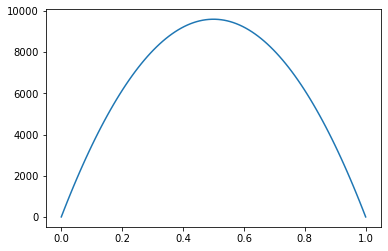

In [59]:
plt.plot(p, y)

In [60]:
max(y)

9603.020099989795

In [63]:
alpha = 1 - 0.997
z = scipy.stats.norm.ppf((1 - alpha / 2))

In [64]:
z

2.9677379253417717

In [66]:
189 / 11034 - 104 / 11037

0.0077060239760047815

In [70]:
n1 = 11037
n2 = 11034
p2hat = 189 / 11034
p1hat = 104 / 11037
q1hat = 1 - p1hat
q2hat = 1 - p2hat
alpha = 0.05
z = scipy.stats.norm.ppf((1 - alpha / 2))

low = p2hat - p1hat - z * ((p1hat * q1hat / n1) + (p2hat * q2hat / n2)) ** (1 / 2)
high = p2hat - p1hat + z * ((p1hat * q1hat / n1) + (p2hat * q2hat / n2)) ** (1 / 2)

print(low, high)

0.004687750675049439 0.010724297276960124


In [75]:
odds2 = p2hat / q2hat
odds1 = p1hat / q1hat

In [77]:
odds2 / odds1

1.8320539419087138

In [81]:
a = 1.96 * (0.67 * 0.23 / 100) ** (1/2)
print(0.67 - a)
print(0.67 + a)

0.5930590772085492
0.7469409227914509


In [115]:
b = (0.67 - 0.75) / (0.67 * 0.33 / 100) ** (1 / 2)

In [116]:
scipy.stats.norm.pdf(b)

0.09383217702012622

In [117]:
22 / 50

0.44

In [118]:
b = (0.44 - 0.75) / (0.44 * 0.56 / 50) ** (1 / 2)

In [119]:
scipy.stats.norm.pdf(b)

2.3246769603700935e-05

In [88]:
data = pd.read_csv('/Users/kotkartoshka/Documents/water.txt', sep='\t')

In [99]:
binx = [0, 40, 80, 120, 160, 200]
biny = [0, 40, 80, 120, 160, 200]

ret = scipy.stats.binned_statistic_2d(data['sn'], data['we'], None, 'count', bins=[binx, biny])
obs = ret.statistic

In [100]:
obs

array([[18., 26., 29., 25., 20.],
       [14., 12., 22., 34., 25.],
       [12., 24., 15., 50., 37.],
       [ 8., 19., 31., 50.,  7.],
       [ 7.,  8., 37., 27., 27.]])

In [98]:
584 / 25

23.36

In [102]:
p = 1 / 25
n = len(data)

In [108]:
chi = obs.copy()
chi = (chi - n * p) ** 2 / (n * p)

In [112]:
chi_stat = sum(sum(chi))

In [113]:
chi_stat

150.58904109589042

In [114]:
scipy.stats.chi2.pdf(chi_stat, n - 1)

1.5365316891615626e-79

In [120]:
(9.57 - 9.5) / (0.4 / (160) ** (1 / 2))

2.213594362117875

In [121]:
scipy.stats.norm.pdf(2.213594362117875)

0.03442616018207645

In [122]:
scipy.stats.norm.pdf(3)

0.0044318484119380075

In [ ]:
(7/8 - 1/2) / ((7/8 * 1/8))

In [123]:
137 / (2 ** 15)

0.004180908203125